## Notater til NAT624-timen om innlasting av nye data

Dette oppgavesettet er oprinnelig notater til en type-along session for å gå gjennom hvordan man laster inn csv-filer i python. Derfor er det litt mindre forklaring underveis, men skriptet kan likevel brukes som en oppskrift for å komme igang med å bruke csv-filer. csv står for Comma-Separates-Values, og er det filformatet dataene NAT624-studentene samler selv kommer på. Flere andre kilder bruker også dette filformatet, for eksempel [Seklima.no](seklima.met.no). I denne oppgaven laster vi inn ett datasett fra Seklima.no, og ett datasett samlet med loggerne NAT624-studentene bruker. 

__________

I denne oppgaven skal vi:

1) laste ned et datasett fra seklima.met.no

2) inspisere datasettet

3) lese datasettet inn i Python med pandas

4) konvertere datasettet til numpy

5) lage en figur

6) lese inn datasettet som Ragnhild har samlet inn

7) lage en figur med data fra både seklima.no og Ragnhild sin hage. 



### Del 1: Laste ned et datasett fra seklima.no

Velg et sted, tidsperiode, og variabel du er interessert i. Alle muligheter finnes ikke for alle steder/variabler.
I eksempelet under bruker vi disse valgene:
- start: 4 Jan 22
- slutt: 6 Jan 22
- timesoppløsning
- lufttemperatur
- Bergen - Florida
- vis resultat - sjekk at det er rett periode
- Last ned csv.

- kopier table.csv til mappen der du har EkteData filene dine
- lag nytt og forståelig navn på filen. 

### Del 2: Inspiser datasettet

Åpne filen i notepad (eller et lignende simpelt tekst-program) for å sjekke informasjon om format og om det er linjer med informasjon øverst i filen ("header"). Hva separerer kolonnene, hva brukes som desimaltegn, hva er navnet på kolonnen som beskriver tid, denne type informasjon finner vi når vi ser på filen i for eksempel notepad. 

### Del 3: lese datasettet inn i Python med pandas

For å laste inn filen bruker vi et nytt bibliotek: *Pandas*. Dette er et bibliotek på samme linje som Numpy eller Matplotlib, og er nyttig å bruke når vi skal laste csv-filer inn i Python fordi de har en innebygd funksjon for nettopp dette. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Endre denne stien til der du har EkteData filene på din PC
sti='W:/Work/Documents/EkteData/MyProg'
# Endre dette filnavnet til det du har kalt filen du nettopp lastet ned. 
fil='/timesnedbør_Bergen_Januar.csv'

# Pass på at resultatet av sti+fil er nøyaktig det samme som der filen
# faktisk ligger på PCen din. 
sti+fil

'W:/Work/Documents/EkteData/MyProg/timesnedbør_Bergen_Januar.csv'

I cellen under bruker vi Pandas sin innebygde funksjon pd.read_csv() til å lese inn filen vår. Denne funksjonen leser inn csv-filer og lagrer informasjonen i en variabel, f.eks. variabelen `df` dersom vi skriver `df=pd.read_csv(file)` slik som under. For å lese inn filen riktig må man angi informasjon om formatet til filen i tillegg til filnavnet (`sti+fil`). Under beskriver vi hva disse spesifikasjonene betyr.

- `sep=';'` beskriver hva som deler kolonnene i filen. Hvis du åpner filen i f.eks. notepad ser du at dette er semikolon i vårt tilfelle, men det er ofte tab, komma (default), eller kolon. 
- `decimal=','` må være med fordi verdiene i denne csv-filen er lagret med komma som desimaltegn istedet for punktum. For at verdien skal tolkes som ett tall og ikke to må vi fortelle funksjonen pd.read_csv at den skal tolke komme som desimaltegn. 
- `parse_dates=['Tid(norsk normaltid)']` konverterer innholdet i denne kolonnen til dato-format.
- `dayfirst=True` sørger for at datoen tolkes riktig. Uten denne tolkes det første tallet i datoen som måned som er default.

Det finnes mange slike spesifiseringer som dette (se dokumentasjonen til funskjonen pd.read_csv [her](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)). De spesifiseringene vi bruker i denne oppgaven fungere i vårt tilfelle, men det betyr ikke at det vil fungere i alle andre tilfeller. Helt sist i oppgaven laster vi inn et temperaturdatasett som Ragnhild har samlet inn, og der er spesifiseringene litt annerledes. Men oppsettet er likt. 

Noen ekstra spesifiseringer vi ikke trenger akkurat nå men som kan være nyttig andre ganger. 
- `na_values='-'`: Hvis du åpner dette datasettet i notepad ser du at dette datasettet setter manglende verdier av moddeltemperatur til `-`. Når man definerer `na_values='-'` forteller man koden at `'-'` betyr at en verdi mangler. Koden setter da alle instanser av `'-'` til `NaN` som står for Not a Number.
- Med `index_col` bestemmer du hvilken kolonne du vil bruke som index. 
- `engine=python`: I datasettet NAT624-studentene samler inn selv er grader Celcius angitt med grad-tegn (special character). Denne detaljen gjør at man må spesifisere "engine".




In [3]:
df = pd.read_csv(
    sti+fil, 
    sep=';', 
    decimal=',', 
    parse_dates=['Tid(norsk normaltid)'],
    dayfirst=True
)

In [4]:
df # Vi kaller variabelen "df" for "DataFrame"

,Navn,Stasjon,Tid(norsk normaltid),Lufttemperatur
0,Bergen - Florida,SN50540,2022-01-04 01:00:00,2.5
1,Bergen - Florida,SN50540,2022-01-04 02:00:00,2.9
2,Bergen - Florida,SN50540,2022-01-04 03:00:00,3.6
3,Bergen - Florida,SN50540,2022-01-04 04:00:00,3.2
4,Bergen - Florida,SN50540,2022-01-04 05:00:00,3.3
...,...,...,...,...
68,Bergen - Florida,SN50540,2022-01-06 21:00:00,3.1
69,Bergen - Florida,SN50540,2022-01-06 22:00:00,3.5
70,Bergen - Florida,SN50540,2022-01-06 23:00:00,3.1
71,Bergen - Florida,SN50540,2022-01-07 00:00:00,2.4


Man får ut en fin tabell. Informasjonen som lå i headeren har kommet som titler på kolonnene, og man ser indeksen til hver rad helt til venstre.

For å få tak i en av kolonnene skriver man som dette:


In [5]:
df['Tid(norsk normaltid)']

0    2022-01-04 01:00:00
1    2022-01-04 02:00:00
2    2022-01-04 03:00:00
3    2022-01-04 04:00:00
4    2022-01-04 05:00:00
             ...        
68   2022-01-06 21:00:00
69   2022-01-06 22:00:00
70   2022-01-06 23:00:00
71   2022-01-07 00:00:00
72                   NaT
Name: Tid(norsk normaltid), Length: 73, dtype: datetime64[ns]

In [6]:
df['Lufttemperatur']

0     2.5
1     2.9
2     3.6
3     3.2
4     3.3
     ... 
68    3.1
69    3.5
70    3.1
71    2.4
72    NaN
Name: Lufttemperatur, Length: 73, dtype: float64

Vi lagrer kolonnen med tid som `tid_Florida` og kolonnen med temperatur som `temp_Florida`. Vi utelukker det siste elementet i begge radene fordi dette bare er NaN. I panda DataFrames angir man navnet til kolonnen først, og så hvilke rader man vil se på. Dette er litt forvirrende siden standard indeksering i python bruker "row" så "column". Men i pandas DataFrame betyr altså `df['Lufttemperatur'][:-1]` "kolonnen for Lufttemperatur" (`['Lufttemperatur']`), og "alle rader utenom den siste" (`[:-1]`). 

In [7]:
tid_Florida=df['Tid(norsk normaltid)'][:-1]
temp_Florida=df['Lufttemperatur'][:-1]

In [8]:
tid_Florida, temp_Florida

(0    2022-01-04 01:00:00
 1    2022-01-04 02:00:00
 2    2022-01-04 03:00:00
 3    2022-01-04 04:00:00
 4    2022-01-04 05:00:00
              ...        
 67   2022-01-06 20:00:00
 68   2022-01-06 21:00:00
 69   2022-01-06 22:00:00
 70   2022-01-06 23:00:00
 71   2022-01-07 00:00:00
 Name: Tid(norsk normaltid), Length: 72, dtype: datetime64[ns],
 0     2.5
 1     2.9
 2     3.6
 3     3.2
 4     3.3
      ... 
 67    3.0
 68    3.1
 69    3.5
 70    3.1
 71    2.4
 Name: Lufttemperatur, Length: 72, dtype: float64)

### Del 4: Konverter variablene du trenger til Numpy
med funksjonen `df.to_numpy()`

Vi vil konvertere Pandas DataFrame (variabelene `df`, `tid_Florida` og `temp_Florida` er alle DataFrames) til et numpy array fordi plottebiblioteket vi bruker, `Matplotlib`, er flinkere til å behandle data på `Numpy`-format enn på `Pandas`-format. Dersom f.eks. tiden mellom måletidspunkt ikke er konstant vil `Pandas` likevel plotte dette med jevne intervall, mens `Numpy` tar stilling til selve tidverdien og plotter datapunktene med så stor avstand de skal ha. Derfor konverterer vi variablene våre fra `pandas` til `Numpy` arrays. 
Denne konverteringen er også praktisk hvis du f.eks. skal sammenligne et datasett som dette med et du har lest inn som numpy array. 

Hvis df er en DataFrame konverterer vi til numpy array med denne funksjonen: `df.to_numpy()`.

For å konvertere motsatt vei bruker man `pd.DataFrame(array)`, hvor "array" er et numpy array.

In [9]:
tid_Florida=tid_Florida.to_numpy()

In [10]:
temp_Florida=temp_Florida.to_numpy()

In [11]:
temp_Florida

array([ 2.5,  2.9,  3.6,  3.2,  3.3,  3.8,  2.9,  3.4,  2.9,  1.5,  2.7,
        3.5,  4.7,  3.6,  3.8,  2.8,  3.7,  3.6,  2.7,  2.4,  2.4,  2.5,
        2.1,  2.2,  2.3,  2. ,  2.3,  1.8,  2.1,  2.3,  2.4,  2.2,  2.5,
        2.3,  2.6,  2.3,  3. ,  2.9,  2.6,  2.5,  2.4,  2.5,  0.9,  0.1,
        1.4,  1. ,  0.7,  0.3, -1.1, -1.3, -1.6, -1.9, -2.4, -2.3, -2.3,
       -2.5, -2.1, -2.2, -0.8,  0.7,  0.9,  1. ,  1.4,  1.5,  1.7,  2.4,
        2.6,  3. ,  3.1,  3.5,  3.1,  2.4])

In [12]:
tid_Florida.shape, temp_Florida.shape

((72,), (72,))

### Del 5: lag en figur
og sammenlign med figuren på seklima.met.no sine nettsider.

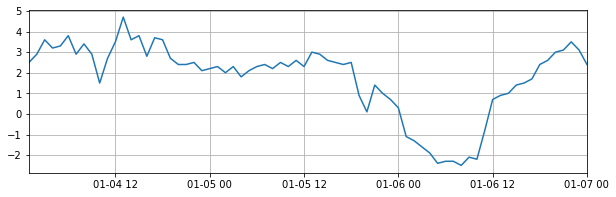

In [13]:
plt.figure(figsize=(10,3))
plt.plot(tid_Florida,temp_Florida)
plt.grid()
plt.xlim(tid_Florida[0], tid_Florida[-1])
plt.show()

### Del 6: Les inn datasettet til Ragnhild

In [14]:
# Husk å endre sti og filnavn slik at det stemmer med oppsettet på din PC
sti='W:/Work/Documents/EkteData/EkteData/data'
fil='/4-6_januar_Temperaturegistrering_AB-vei.csv'

Datasettet til Ragnhild er satt opp litt annerledes enn datasettene til seklima.no. Men begge datsettene er på csv-format, så vi bruker fremdeles funksjonen `pd.read_csv()`. Spesifiseringene vi tregner nå er:
- `sep=','`: kolonnene i csv-filen er skilt med komma. Dette er default for csv-filer, så denne spesifiseringen er strengt tatt overflødig.
- `engine=python`: siden Celcius en angitt med grad-tegn (special character) må man spesifisere engine.
- `parse:dates=['Time']`: konverterer kolonnen med tid til "Timestamp" som er lett å jobbe med for tid.

Dette er ikke spesifiseringer man husker i hodet. Istedet bruker man dokumentasjonen, ser på hva man får ut eller feilmeldingen, og justerer til man får ut en tabell som inneholder all informasjonen i datafilen du leser inn. Som en tommelfingerregel trenger man nesten alltid `sep=''` og `parse_dates=['']`.

In [15]:
df=pd.read_csv(
    sti+fil, sep=',', engine='python',
    parse_dates=['Time']
)

In [16]:
df

,Temp AB-vei,Time,Celsius(°C),Comments,Serial Number
0,1,2022-01-04 15:00:00,4.0,NaN,60039020.0
1,2,2022-01-04 15:01:00,4.0,NaN,NaN
2,3,2022-01-04 15:02:00,4.0,NaN,NaN
3,4,2022-01-04 15:03:00,4.0,NaN,NaN
4,5,2022-01-04 15:04:00,4.0,NaN,NaN
...,...,...,...,...,...
2569,2570,2022-01-06 09:49:00,9.5,NaN,NaN
2570,2571,2022-01-06 09:50:00,10.5,NaN,NaN
2571,2572,2022-01-06 09:51:00,11.0,NaN,NaN
2572,2573,2022-01-06 09:52:00,12.0,NaN,NaN


In [17]:
tid=df['Time']
temp=df['Celsius(°C)']

In [18]:
temp=temp.to_numpy()
tid=tid.to_numpy()

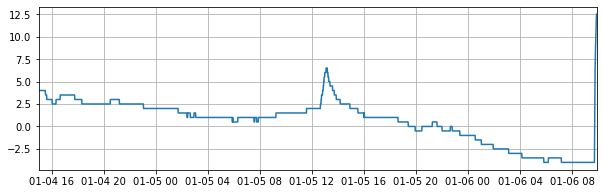

In [19]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

### Del 7: Lag en figur med både data fra seklima.no og Ragnhild sin hage.

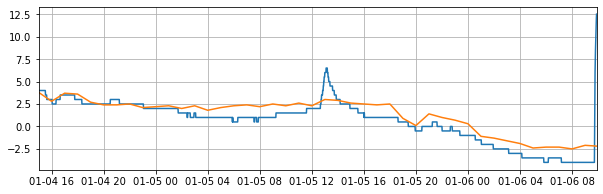

In [20]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.plot(tid_Florida,temp_Florida)
plt.grid()
plt.xlim(tid[0], tid[-1])
plt.show()

Dette ser jo ikke så gale ut! Men hva skjedde ca kl 13 den 5. januar og kl 10 den 6. januar? Var været hos Ragnhild litt anneledes enn været på Florida? Kan det være en feilkilde? Var det skygge eller sol, eller ble instrumentet tatt inn før loggeren ble skrudd av? 

Det er viktig å ta litt notater iblant når man henter inn data (dersom det er mulig). Det kan gjøre det mye enklere å tolke dataene i etterkant!

Vi ser mer på hvordan vi kan behandle slike data i oppgaven [Del7_databehandling_av_egne_data](https://github.com/irendundas/EkteData/blob/main/NAT624/Del7_databehandling_av_egne_data.ipynb)

_________________
#### Et lite notat:
Man kan også konvertere hele dataframen (df) til numpy på en gang istedet for å plukke ut de kolonnene vi trenger og så konvertere disse (slik som vi gjorde over). Hvis man konvertere hele dataframen til numpy med en gang kan man indeksere kolonnene som vanlig:

In [21]:
data=df.to_numpy()
data

array([[1, Timestamp('2022-01-04 15:00:00'), 4.0, nan, 60039020.0],
       [2, Timestamp('2022-01-04 15:01:00'), 4.0, nan, nan],
       [3, Timestamp('2022-01-04 15:02:00'), 4.0, nan, nan],
       ...,
       [2572, Timestamp('2022-01-06 09:51:00'), 11.0, nan, nan],
       [2573, Timestamp('2022-01-06 09:52:00'), 12.0, nan, nan],
       [2574, Timestamp('2022-01-06 09:53:00'), 12.5, nan, nan]],
      dtype=object)

In [22]:
# Vanlig indekseing: ":" for alle radene, og "1" for kolonne med indeks 1
tid=data[:,1] 
tid

array([Timestamp('2022-01-04 15:00:00'), Timestamp('2022-01-04 15:01:00'),
       Timestamp('2022-01-04 15:02:00'), ...,
       Timestamp('2022-01-06 09:51:00'), Timestamp('2022-01-06 09:52:00'),
       Timestamp('2022-01-06 09:53:00')], dtype=object)

In [23]:
temp=data[:,2]
temp

array([4.0, 4.0, 4.0, ..., 11.0, 12.0, 12.5], dtype=object)

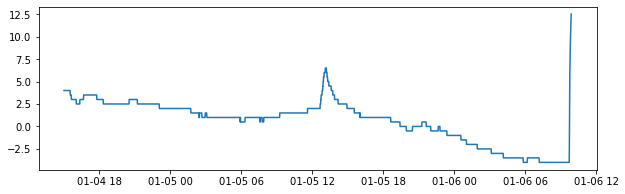

In [24]:
plt.figure(figsize=(10,3))
plt.plot(tid,temp)
plt.show()